<a href="https://colab.research.google.com/github/sagihaider/EEG_Deep/blob/master/main_Single_Trial_Classification_Accuracy_all_subjects_FilteredData_NSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sagihaider/EEG_Deep.git

Cloning into 'EEG_Deep'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 222 (delta 34), reused 12 (delta 5), pack-reused 153
Receiving objects: 100% (222/222), 860.09 MiB | 36.88 MiB/s, done.
Resolving deltas: 100% (87/87), done.
Checking out files: 100% (62/62), done.


In [3]:
import scipy.io as spio
import numpy as np
from importlib.machinery import SourceFileLoader

# EEGNet-specific imports
from EEG_Deep.EEGModels import EEGNet, ShallowConvNet, DeepConvNet
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
K.set_image_data_format('channels_first')

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# tools for plotting confusion matrices
from matplotlib import pyplot as plt
from scipy.signal import butter, lfilter

!pip install neural_structured_learning
import neural_structured_learning as nsl
import tensorflow as tf

     |████████████████████████████████| 112kB 6.7MB/s 


In [0]:
# Band-pass Filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y


EEG_Deep/Data2A/Data_A01T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A01E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 240 samples, validate on 47 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.38375, saving model to /tmp/checkpoint.h5
240/240 - 7s - loss: 1.3850 - acc: 0.2792 - val_loss: 1.3837 - val_acc: 0.3617
Epoch 2/100

Epoch 00002: val_loss improved from 1.38375 to 1.38205, saving model to /tmp/checkpoint.h5
240/240 - 0s - loss: 1.3701 - acc: 0.3083 - val_loss: 1.3821 - val_acc: 0.3830
Epoch 3/100

Epoch 00003: val_loss improved from 1.38205 to 1.37981, saving model to /tmp/checkpoint.h5
240/240 - 0s - loss: 1.3424 - acc: 0.3708 - val_loss: 1.3798 - val_acc: 0.3404
Epoch 4/100

Epoch 00004: val_lo

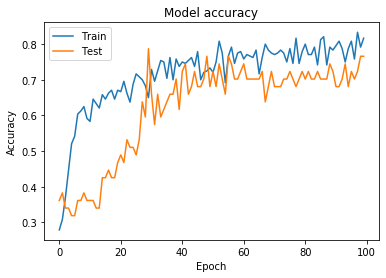


# Evaluate on test data
288/288 [==============================] - 1s 2ms/sample - loss: 0.7156 - acc: 0.6910
test loss, test acc: [0.7155984596336364, 0.6909722]



EEG_Deep/Data2A/Data_A02T.mat


Using TensorFlow backend.


(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A02E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 240 samples, validate on 47 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.38571, saving model to /tmp/checkpoint.h5
240/240 - 1s - loss: 1.3928 - acc: 0.2917 - val_loss: 1.3857 - val_acc: 0.1915
Epoch 2/100

Epoch 00002: val_loss improved from 1.38571 to 1.38365, saving model to /tmp/checkpoint.h5
240/240 - 0s - loss: 1.3746 - acc: 0.3125 - val_loss: 1.3836 - val_acc: 0.2766
Epoch 3/100

Epoch 00003: val_loss improved from 1.38365 to 1.38154, saving model to /tmp/checkpoint.h5
240/240 - 0s - loss: 1.3718 - acc: 0.2833 - val_loss: 1.3815 - val_acc: 0.3191
Epoch 4/100

Epoch 00004: val_loss improved from 1.38154 to 1.38038, saving model to /tmp/checkpoint.h5
240/240 - 0s - loss: 1.3562 - acc: 0.37

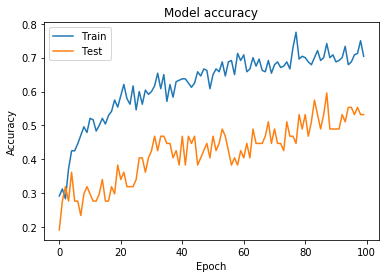


# Evaluate on test data
288/288 [==============================] - 1s 3ms/sample - loss: 1.2004 - acc: 0.4792
test loss, test acc: [1.2004271589426532, 0.47916666]
EEG_Deep/Data2A/Data_A03T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A03E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 240 samples, validate on 47 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.38354, saving model to /tmp/checkpoint.h5
240/240 - 1s - loss: 1.3921 - acc: 0.2917 - val_loss: 1.3835 - val_acc: 0.2553
Epoch 2/100

Epoch 00002: val_loss improved from 1.38354 to 1.38289, saving model to /tmp/checkpoint.h5
240/240 - 0s - loss: 1.3675 - acc: 0.3042 - val_loss: 1.3829 - val_acc: 0.2553
Epoch 3/100

Epoch 00003: val_loss improved from 1.38289 to 1.38121, saving model to /tmp/checkpoint.h5
240/240 - 0s - loss: 1.3546

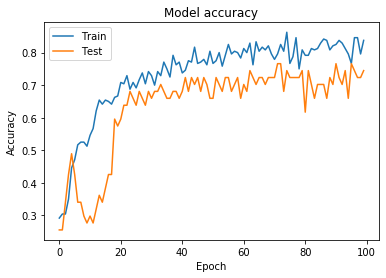


# Evaluate on test data
288/288 [==============================] - 1s 2ms/sample - loss: 0.5777 - acc: 0.8021
test loss, test acc: [0.5777306197366366, 0.8020833]
EEG_Deep/Data2A/Data_A04T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A04E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 240 samples, validate on 47 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.38543, saving model to /tmp/checkpoint.h5
240/240 - 1s - loss: 1.4158 - acc: 0.1875 - val_loss: 1.3854 - val_acc: 0.3191
Epoch 2/100

Epoch 00002: val_loss improved from 1.38543 to 1.38365, saving model to /tmp/checkpoint.h5
240/240 - 0s - loss: 1.3795 - acc: 0.2958 - val_loss: 1.3837 - val_acc: 0.3830
Epoch 3/100

Epoch 00003: val_loss improved from 1.38365 to 1.38196, saving model to /tmp/checkpoint.h5
240/240 - 0s - loss: 1.3772 

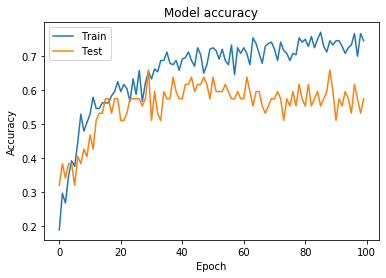


# Evaluate on test data
288/288 [==============================] - 1s 3ms/sample - loss: 0.9646 - acc: 0.5799
test loss, test acc: [0.9645781431140171, 0.5798611]
EEG_Deep/Data2A/Data_A05T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A05E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 240 samples, validate on 47 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.38163, saving model to /tmp/checkpoint.h5
240/240 - 1s - loss: 1.4058 - acc: 0.2333 - val_loss: 1.3816 - val_acc: 0.3191
Epoch 2/100

Epoch 00002: val_loss improved from 1.38163 to 1.37946, saving model to /tmp/checkpoint.h5
240/240 - 0s - loss: 1.3607 - acc: 0.3125 - val_loss: 1.3795 - val_acc: 0.3404
Epoch 3/100

Epoch 00003: val_loss improved from 1.37946 to 1.37627, saving model to /tmp/checkpoint.h5
240/240 - 0s - loss: 1.3496 

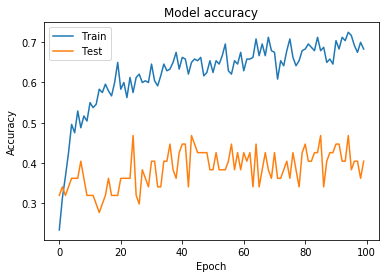


# Evaluate on test data
288/288 [==============================] - 1s 2ms/sample - loss: 1.2832 - acc: 0.4097
test loss, test acc: [1.2832148969173431, 0.4097222]
EEG_Deep/Data2A/Data_A06T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A06E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 240 samples, validate on 47 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.38316, saving model to /tmp/checkpoint.h5
240/240 - 1s - loss: 1.3893 - acc: 0.2542 - val_loss: 1.3832 - val_acc: 0.2979
Epoch 2/100

Epoch 00002: val_loss did not improve from 1.38316
240/240 - 0s - loss: 1.3696 - acc: 0.3083 - val_loss: 1.3839 - val_acc: 0.2766
Epoch 3/100

Epoch 00003: val_loss did not improve from 1.38316
240/240 - 0s - loss: 1.3681 - acc: 0.3167 - val_loss: 1.3836 - val_acc: 0.2979
Epoch 4/100

Epoch 00004: val

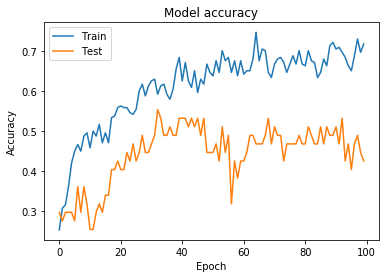


# Evaluate on test data
288/288 [==============================] - 1s 3ms/sample - loss: 1.2311 - acc: 0.4375
test loss, test acc: [1.2311457128962502, 0.4375]
EEG_Deep/Data2A/Data_A07T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A07E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 240 samples, validate on 47 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.38684, saving model to /tmp/checkpoint.h5
240/240 - 1s - loss: 1.4020 - acc: 0.2542 - val_loss: 1.3868 - val_acc: 0.2766
Epoch 2/100

Epoch 00002: val_loss improved from 1.38684 to 1.38609, saving model to /tmp/checkpoint.h5
240/240 - 0s - loss: 1.3769 - acc: 0.2833 - val_loss: 1.3861 - val_acc: 0.3191
Epoch 3/100

Epoch 00003: val_loss improved from 1.38609 to 1.38444, saving model to /tmp/checkpoint.h5
240/240 - 0s - loss: 1.3568 - a

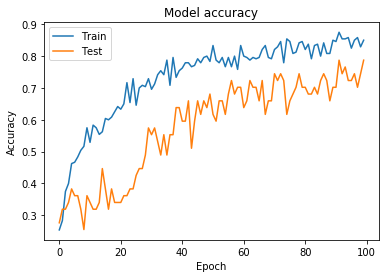


# Evaluate on test data
288/288 [==============================] - 1s 2ms/sample - loss: 0.6888 - acc: 0.7292
test loss, test acc: [0.6887687524033734, 0.7291667]
EEG_Deep/Data2A/Data_A08T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A08E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 240 samples, validate on 47 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.39010, saving model to /tmp/checkpoint.h5
240/240 - 1s - loss: 1.4181 - acc: 0.2292 - val_loss: 1.3901 - val_acc: 0.1489
Epoch 2/100

Epoch 00002: val_loss improved from 1.39010 to 1.38747, saving model to /tmp/checkpoint.h5
240/240 - 0s - loss: 1.3813 - acc: 0.2792 - val_loss: 1.3875 - val_acc: 0.2128
Epoch 3/100

Epoch 00003: val_loss improved from 1.38747 to 1.38538, saving model to /tmp/checkpoint.h5
240/240 - 0s - loss: 1.3644 

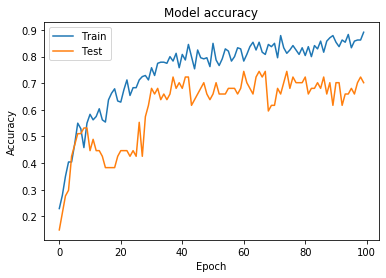


# Evaluate on test data
288/288 [==============================] - 1s 2ms/sample - loss: 0.6781 - acc: 0.7535
test loss, test acc: [0.6781420173906049, 0.7534722]
EEG_Deep/Data2A/Data_A09T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A09E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 240 samples, validate on 47 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.36782, saving model to /tmp/checkpoint.h5
240/240 - 1s - loss: 1.4069 - acc: 0.2625 - val_loss: 1.3678 - val_acc: 0.3830
Epoch 2/100

Epoch 00002: val_loss improved from 1.36782 to 1.36308, saving model to /tmp/checkpoint.h5
240/240 - 0s - loss: 1.3544 - acc: 0.3542 - val_loss: 1.3631 - val_acc: 0.3191
Epoch 3/100

Epoch 00003: val_loss improved from 1.36308 to 1.35611, saving model to /tmp/checkpoint.h5
240/240 - 0s - loss: 1.3299 

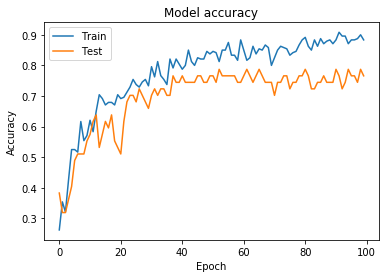


# Evaluate on test data
288/288 [==============================] - 1s 3ms/sample - loss: 0.5724 - acc: 0.7639
test loss, test acc: [0.5723730965082723, 0.7638889]
[[0.71559846 0.69097221]
 [1.20042716 0.47916666]
 [0.57773062 0.80208331]
 [0.96457814 0.5798611 ]
 [1.2832149  0.40972221]
 [1.23114571 0.4375    ]
 [0.68876875 0.72916669]
 [0.67814202 0.75347221]
 [0.5723731  0.7638889 ]]


<Figure size 432x288 with 0 Axes>

In [4]:
from numpy import zeros
K.clear_session()
cols = 2
rows = 9
acc_all = zeros([rows, cols])
X_tr = np.empty([288, 22, 1875])
X_ts = np.empty([288, 22, 1875])


for x in range(1,10):
  fName = 'EEG_Deep/Data2A/Data_A0' + str(x) + 'T.mat'  # Load Data
  print(fName)
  mat = spio.loadmat(fName)
  r_X_tr = mat['cleanRawEEGData']
  y_tr = mat['cleanClassLabels']
  
  print(np.shape(r_X_tr))
  print(np.shape(y_tr))

  for t in range(r_X_tr.shape[0]):
    tril = r_X_tr[t,:,:]
    # tril = tril.transpose()
    tril_filtered = butter_bandpass_filter(tril, 
                                              lowcut=4, 
                                              highcut=40, 
                                              fs=250,
                                              order=4)
    # tril_filtered = tril_filtered.transpose()
    X_tr[t,:,:] = tril_filtered 
    
  # split data of each subject in training and validation
  X_train      = X_tr[0:240,:,500:1250]
  Y_train      = y_tr[0:240]
  X_val       = X_tr[241:,:,500:1250]
  Y_val       = y_tr[241:]

  print(np.shape(X_train))
  print(np.shape(Y_train))
  print(np.shape(X_val))
  print(np.shape(Y_val))
  
  # convert labels to one-hot encodings.
  Y_train      = np_utils.to_categorical(Y_train-1)
  Y_val       = np_utils.to_categorical(Y_val-1)

  kernels, chans, samples = 1, 22, 750
  # convert data to NCHW (trials, kernels, channels, samples) format. Data 
  # contains 22 channels and 500 time-points. Set the number of kernels to 1.
  X_train      = X_train.reshape(X_train.shape[0], kernels, chans, samples)
  X_val       = X_val.reshape(X_val.shape[0], kernels, chans, samples)
   
  print('X_train shape:', X_train.shape)
  print(X_train.shape[0], 'train samples')
  print(X_val.shape[0], 'val samples')

  # Load test data         
  fName = 'EEG_Deep/Data2A/Data_A0' + str(x) + 'E.mat'  # Load Data
  print(fName)
  mat = spio.loadmat(fName)
  r_X_ts = mat['cleanRawEEGData']
  y_ts = mat['cleanClassLabels']

  print(np.shape(r_X_ts))
  print(np.shape(y_ts))

  for t in range(r_X_ts.shape[0]):
    tril = r_X_ts[t,:,:]
    # tril = tril.transpose()
    tril_filtered = butter_bandpass_filter(tril, 
                                              lowcut=4, 
                                              highcut=40, 
                                              fs=250,
                                              order=4)
    # tril_filtered = tril_filtered.transpose()
    X_ts[t,:,:] = tril_filtered 

  X_test      = X_ts[:,:,500:1250]
  Y_test      = y_ts[:]
  print(np.shape(X_test))
  print(np.shape(Y_test))

  #convert labels to one-hot encodings.
  Y_test      = np_utils.to_categorical(Y_test-1)

  # convert data to NCHW (trials, kernels, channels, samples) format. Data 
  # contains 22 channels and 500 time-points. Set the number of kernels to 1.
  X_test      = X_test.reshape(X_test.shape[0], kernels, chans, samples)

  print('X_train shape:', X_test.shape)
  print(X_test.shape[0], 'train samples')

  # configure the EEGNet-8,2,16 model with kernel length of 32 samples (other 
  # model configurations may do better, but this is a good starting point)
  model = EEGNet(nb_classes = 4, Chans = 22, Samples = 750, 
                 dropoutRate = 0.5, kernLength = 25, F1 = 8, 
                 D = 2, F2 = 16, norm_rate = 0.25, dropoutType = 'Dropout')

  # compile the model and set the optimizers
  model.compile(loss='categorical_crossentropy', optimizer='adam', 
                metrics = ['accuracy'])

  # count number of parameters in the model
  numParams    = model.count_params() 

  # set a valid path for your system to record model checkpoints
  checkpointer = ModelCheckpoint(filepath='/tmp/checkpoint.h5', verbose=1,
                                 save_best_only=True)
  
  # the syntax is {class_1:weight_1, class_2:weight_2,...}. Here just setting
  # the weights all to be 1
  class_weights = {0:1, 1:1, 2:1, 3:1}

################################################################################
# fit the model. Due to very small sample sizes this can get
# pretty noisy run-to-run, but most runs should be comparable to xDAWN + 
# Riemannian geometry classification (below)
################################################################################
  history = model.fit(X_train, Y_train, batch_size = 16, epochs = 100, 
                      verbose = 2, validation_data=(X_val, Y_val),
                      callbacks=[checkpointer], class_weight = class_weights)
  
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  figName = 'Accuracy_A0' + str(x) + '.png'  
  plt.savefig(figName)

  print('\n# Evaluate on test data')
  results = model.evaluate(X_test, Y_test, batch_size=1)
  print('test loss, test acc:', results)

  acc_all[x - 1, 0] = results[0]
  acc_all[x - 1, 1] = results[1]

  from keras import backend as K 
  # Do some code, e.g. train and save model
  K.clear_session()


print(acc_all)

import pandas as pd
df_accl_all = pd.DataFrame({'Loss ': acc_all[:, 0], 'Eval Acc': acc_all[:, 1]})
df_accl_all.to_csv (r'EEG_Deep/df_accl_8_12_Hz4_Class.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

EEG_Deep/Data2A/Data_A01T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A01E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/100
8/8 [==============================] - 0s 62ms/step - loss: 1.4046 - categorical_crossentropy: 1.4046 - categorical_accuracy: 0.2625 - val_loss: 1.3885 - val_categorical_crossentropy: 1.3885 - val_categorical_accuracy: 0.2553
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 1.3663 - categorical_crossentropy: 1.3663 - categorical_accuracy: 0.2917 - val_loss: 1.3883 - val_categorical_crossentropy: 1.3883 - val_categorical_accuracy: 0.2128
Epoch 3/100
8/8 [==============================] - 0s 15ms/step - loss: 1.3659 - categorical_crossentropy: 1.3659 - categorical_accuracy: 0.3542 - val_loss: 1.3874 - val_categorical_crossen

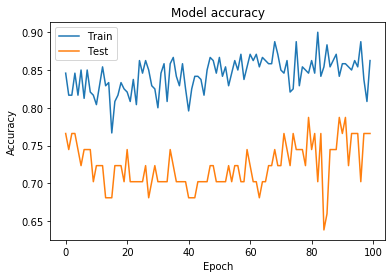


# Evaluate on test data
9/9 [==============================] - 0s 14ms/step - loss: 0.6414 - categorical_crossentropy: 0.6414 - categorical_accuracy: 0.7049
test loss, test acc: [0.6413933436075846, 0.64139336, 0.7048611]
EEG_Deep/Data2A/Data_A02T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A02E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/100
8/8 [==============================] - 0s 61ms/step - loss: 1.3963 - categorical_crossentropy: 1.3963 - categorical_accuracy: 0.2667 - val_loss: 1.3861 - val_categorical_crossentropy: 1.3861 - val_categorical_accuracy: 0.1702
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 1.3596 - categorical_crossentropy: 1.3596 - categorical_accuracy: 0.3208 - val_loss: 1.3849 - val_categorical_crossentropy: 1.3849 -

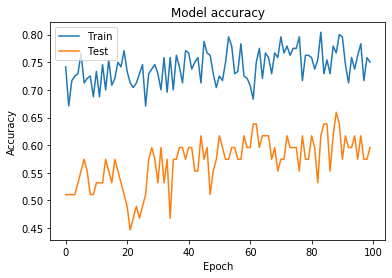


# Evaluate on test data
9/9 [==============================] - 0s 15ms/step - loss: 1.1850 - categorical_crossentropy: 1.1850 - categorical_accuracy: 0.5069
test loss, test acc: [1.184979173872206, 1.1849792, 0.5069444]
EEG_Deep/Data2A/Data_A03T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A03E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/100
8/8 [==============================] - 1s 67ms/step - loss: 1.4084 - categorical_crossentropy: 1.4084 - categorical_accuracy: 0.2625 - val_loss: 1.3794 - val_categorical_crossentropy: 1.3794 - val_categorical_accuracy: 0.2766
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 1.3669 - categorical_crossentropy: 1.3669 - categorical_accuracy: 0.3167 - val_loss: 1.3795 - val_categorical_crossentropy: 1.3795 - v

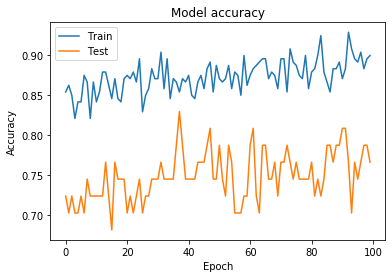


# Evaluate on test data
9/9 [==============================] - 0s 16ms/step - loss: 0.5050 - categorical_crossentropy: 0.5050 - categorical_accuracy: 0.7951
test loss, test acc: [0.5049735175238715, 0.50497353, 0.7951389]
EEG_Deep/Data2A/Data_A04T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A04E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/100
8/8 [==============================] - 1s 63ms/step - loss: 1.4227 - categorical_crossentropy: 1.4227 - categorical_accuracy: 0.2375 - val_loss: 1.3875 - val_categorical_crossentropy: 1.3875 - val_categorical_accuracy: 0.3191
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 1.3810 - categorical_crossentropy: 1.3810 - categorical_accuracy: 0.3250 - val_loss: 1.3840 - val_categorical_crossentropy: 1.3840 -

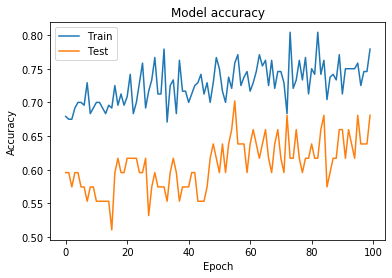


# Evaluate on test data
9/9 [==============================] - 0s 15ms/step - loss: 0.9696 - categorical_crossentropy: 0.9696 - categorical_accuracy: 0.5868
test loss, test acc: [0.9695694910155402, 0.9695695, 0.5868056]
EEG_Deep/Data2A/Data_A05T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A05E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/100
8/8 [==============================] - 1s 66ms/step - loss: 1.3961 - categorical_crossentropy: 1.3961 - categorical_accuracy: 0.2667 - val_loss: 1.3794 - val_categorical_crossentropy: 1.3794 - val_categorical_accuracy: 0.3404
Epoch 2/100
8/8 [==============================] - 0s 15ms/step - loss: 1.3695 - categorical_crossentropy: 1.3695 - categorical_accuracy: 0.3500 - val_loss: 1.3788 - val_categorical_crossentropy: 1.3788 - 

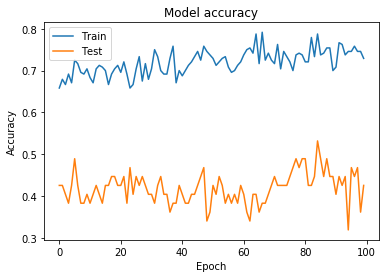


# Evaluate on test data
9/9 [==============================] - 0s 15ms/step - loss: 1.2792 - categorical_crossentropy: 1.2792 - categorical_accuracy: 0.4306
test loss, test acc: [1.2792160511016846, 1.279216, 0.43055555]
EEG_Deep/Data2A/Data_A06T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A06E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/100
8/8 [==============================] - 0s 62ms/step - loss: 1.4104 - categorical_crossentropy: 1.4104 - categorical_accuracy: 0.2333 - val_loss: 1.3876 - val_categorical_crossentropy: 1.3876 - val_categorical_accuracy: 0.2340
Epoch 2/100
8/8 [==============================] - 0s 17ms/step - loss: 1.3720 - categorical_crossentropy: 1.3720 - categorical_accuracy: 0.2875 - val_loss: 1.3857 - val_categorical_crossentropy: 1.3857 - 

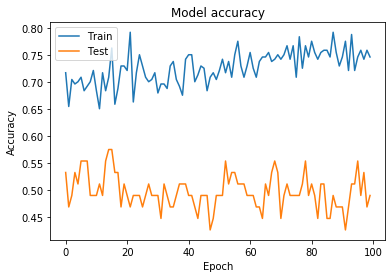


# Evaluate on test data
9/9 [==============================] - 0s 14ms/step - loss: 1.1684 - categorical_crossentropy: 1.1684 - categorical_accuracy: 0.4896
test loss, test acc: [1.1683756510416667, 1.1683756, 0.48958334]
EEG_Deep/Data2A/Data_A07T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A07E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/100
8/8 [==============================] - 0s 61ms/step - loss: 1.3992 - categorical_crossentropy: 1.3992 - categorical_accuracy: 0.2833 - val_loss: 1.3837 - val_categorical_crossentropy: 1.3837 - val_categorical_accuracy: 0.2979
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 1.3731 - categorical_crossentropy: 1.3731 - categorical_accuracy: 0.3042 - val_loss: 1.3825 - val_categorical_crossentropy: 1.3825 -

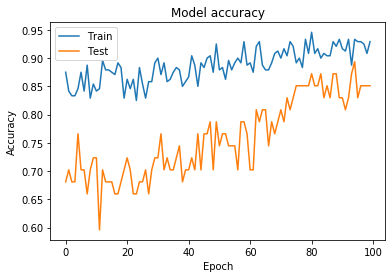


# Evaluate on test data
9/9 [==============================] - 0s 16ms/step - loss: 0.5218 - categorical_crossentropy: 0.5218 - categorical_accuracy: 0.8160
test loss, test acc: [0.5218257738484277, 0.5218258, 0.8159722]
EEG_Deep/Data2A/Data_A08T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A08E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/100
8/8 [==============================] - 0s 62ms/step - loss: 1.4028 - categorical_crossentropy: 1.4028 - categorical_accuracy: 0.2583 - val_loss: 1.3862 - val_categorical_crossentropy: 1.3862 - val_categorical_accuracy: 0.2340
Epoch 2/100
8/8 [==============================] - 0s 17ms/step - loss: 1.3703 - categorical_crossentropy: 1.3703 - categorical_accuracy: 0.3208 - val_loss: 1.3849 - val_categorical_crossentropy: 1.3849 - 

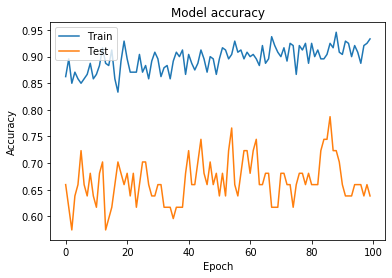


# Evaluate on test data
9/9 [==============================] - 0s 15ms/step - loss: 0.6724 - categorical_crossentropy: 0.6724 - categorical_accuracy: 0.7326
test loss, test acc: [0.6723950240347121, 0.67239505, 0.7326389]
EEG_Deep/Data2A/Data_A09T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A09E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/100
8/8 [==============================] - 0s 61ms/step - loss: 1.3960 - categorical_crossentropy: 1.3960 - categorical_accuracy: 0.2500 - val_loss: 1.3833 - val_categorical_crossentropy: 1.3833 - val_categorical_accuracy: 0.2340
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 1.3662 - categorical_crossentropy: 1.3662 - categorical_accuracy: 0.3375 - val_loss: 1.3817 - val_categorical_crossentropy: 1.3817 -

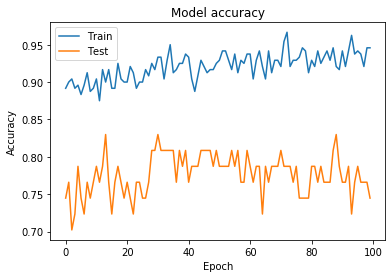


# Evaluate on test data
9/9 [==============================] - 0s 16ms/step - loss: 0.4688 - categorical_crossentropy: 0.4688 - categorical_accuracy: 0.8368
test loss, test acc: [0.4687746398978763, 0.4687746, 0.8368056]
[[0.64139336 0.7048611 ]
 [1.1849792  0.50694442]
 [0.50497353 0.7951389 ]
 [0.9695695  0.58680558]
 [1.27921605 0.43055555]
 [1.16837561 0.48958334]
 [0.52182579 0.81597221]
 [0.67239505 0.7326389 ]
 [0.46877459 0.83680558]]


<Figure size 432x288 with 0 Axes>

In [9]:
from numpy import zeros
K.clear_session()
cols = 2
rows = 9
acc_all = zeros([rows, cols])
X_tr = np.empty([288, 22, 1875])
X_ts = np.empty([288, 22, 1875])


for x in range(1,10):
  fName = 'EEG_Deep/Data2A/Data_A0' + str(x) + 'T.mat'  # Load Data
  print(fName)
  mat = spio.loadmat(fName)
  r_X_tr = mat['cleanRawEEGData']
  y_tr = mat['cleanClassLabels']
  
  print(np.shape(r_X_tr))
  print(np.shape(y_tr))

  for t in range(r_X_tr.shape[0]):
    tril = r_X_tr[t,:,:]
    # tril = tril.transpose()
    tril_filtered = butter_bandpass_filter(tril, 
                                              lowcut=4, 
                                              highcut=40, 
                                              fs=250,
                                              order=4)
    # tril_filtered = tril_filtered.transpose()
    X_tr[t,:,:] = tril_filtered 
    
  # split data of each subject in training and validation
  X_train      = X_tr[0:240,:,500:1250]
  Y_train      = y_tr[0:240]
  X_val       = X_tr[241:,:,500:1250]
  Y_val       = y_tr[241:]

  print(np.shape(X_train))
  print(np.shape(Y_train))
  print(np.shape(X_val))
  print(np.shape(Y_val))
  
  # convert labels to one-hot encodings.
  Y_train      = np_utils.to_categorical(Y_train-1)
  Y_val       = np_utils.to_categorical(Y_val-1)

  kernels, chans, samples = 1, 22, 750
  # convert data to NCHW (trials, kernels, channels, samples) format. Data 
  # contains 22 channels and 500 time-points. Set the number of kernels to 1.
  X_train      = X_train.reshape(X_train.shape[0], kernels, chans, samples)
  X_val       = X_val.reshape(X_val.shape[0], kernels, chans, samples)
   
  print('X_train shape:', X_train.shape)
  print(X_train.shape[0], 'train samples')
  print(X_val.shape[0], 'val samples')

  # Load test data         
  fName = 'EEG_Deep/Data2A/Data_A0' + str(x) + 'E.mat'  # Load Data
  print(fName)
  mat = spio.loadmat(fName)
  r_X_ts = mat['cleanRawEEGData']
  y_ts = mat['cleanClassLabels']

  print(np.shape(r_X_ts))
  print(np.shape(y_ts))

  for t in range(r_X_ts.shape[0]):
    tril = r_X_ts[t,:,:]
    # tril = tril.transpose()
    tril_filtered = butter_bandpass_filter(tril, 
                                              lowcut=4, 
                                              highcut=40, 
                                              fs=250,
                                              order=4)
    # tril_filtered = tril_filtered.transpose()
    X_ts[t,:,:] = tril_filtered 

  X_test      = X_ts[:,:,500:1250]
  Y_test      = y_ts[:]
  print(np.shape(X_test))
  print(np.shape(Y_test))

  #convert labels to one-hot encodings.
  Y_test      = np_utils.to_categorical(Y_test-1)

  # convert data to NCHW (trials, kernels, channels, samples) format. Data 
  # contains 22 channels and 500 time-points. Set the number of kernels to 1.
  X_test      = X_test.reshape(X_test.shape[0], kernels, chans, samples)

  print('X_train shape:', X_test.shape)
  print(X_test.shape[0], 'train samples')

  # configure the EEGNet-8,2,16 model with kernel length of 32 samples (other 
  # model configurations may do better, but this is a good starting point)
  model = EEGNet(nb_classes = 4, Chans = 22, Samples = 750, 
                 dropoutRate = 0.5, kernLength = 25, F1 = 8, 
                 D = 2, F2 = 16, norm_rate = 0.25, dropoutType = 'Dropout')

  adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.5, adv_grad_norm='infinity')
  adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)
  
  # compile the model and set the optimizers
  adv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
  batch_size = 32

  X_train = tf.cast(X_train, tf.float32)
  X_test = tf.cast(X_test, tf.float32)
  X_val = tf.cast(X_val, tf.float32)


  train_data = tf.data.Dataset.from_tensor_slices({'input': X_train, 'label': Y_train}).batch(batch_size)
  val_data = tf.data.Dataset.from_tensor_slices({'input': X_val, 'label': Y_val}).batch(batch_size)
  test_data = tf.data.Dataset.from_tensor_slices({'input': X_test, 'label': Y_test}).batch(batch_size)

  val_steps = X_val.shape[0] // batch_size

  
  adv_model.fit(train_data, validation_data=val_data, validation_steps=None, epochs=100, verbose=1)

  history = adv_model.fit(train_data, validation_data=val_data, validation_steps=None, epochs=100, verbose=1)

  # Plot training & validation accuracy values
  plt.plot(history.history['categorical_accuracy'])
  plt.plot(history.history['val_categorical_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  figName = 'Accuracy_A0' + str(x) + '.png'  
  plt.savefig(figName)

  print('\n# Evaluate on test data')
  results = adv_model.evaluate(test_data)
  print('test loss, test acc:', results)

  acc_all[x - 1, 0] = results[1]
  acc_all[x - 1, 1] = results[2]

  from keras import backend as K 
  # Do some code, e.g. train and save model
  K.clear_session()


print(acc_all)